In [1]:
import numpy as np
from IPython.display import display, Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Ejercicio 1: la vibración en un sistema unidimensional.

Sea un sistema de $N$ partículas idénticas en una dimensión unidas por muelles.
Una vez desplazado del equilibrio, cada una de las partículas vibrará con respecto a las demás debido a los muelles. 

(Este modelo describe de forma bastante precisa la vibración de los átomos en algunos sólidos.)

La dinámica de este sistema viene dada por la ecuaciones de Newton. 
Llamando $x_{i}$ el desplazamiento de la partícula $i$ con respecto a su posición de reposo, la segunda ley impone:

\begin{align}
m\,\ddot x_1 =&\; k \;(x_{2}-x_1)+F_1,\nonumber\\
m\,\ddot x_i =&\; k \;(x_{i+1}-x_i) +k\;(x_{i-1}-x_{i})+F_i,\;\text{con}\;1<i<N,\nonumber\\
m\,\ddot x_N =&\; k \;(x_{N-1}-x_N)+F_N,\nonumber\\
\end{align}

siendo $m$ la masa de las partículas, $k$ la constante del muelle y $F_i$ cualquier fuerza externa aplicada sobre la partícula $i$. 

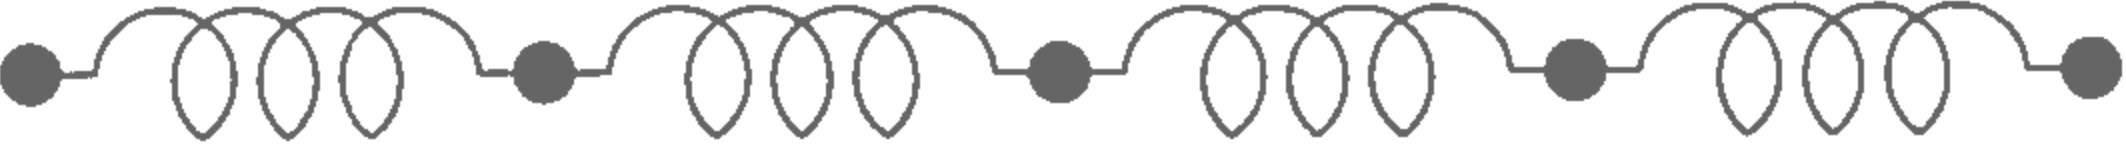

In [2]:
display(Image(filename='spring.png'))

Asumamos ahora que accionamos el sistema al aplicar una fuerza armónica (sinusoidal) sobre la primera partícula de la forma:

$$F_1=C \text{e}^{i\,\omega\,t},$$

siendo $C$ una constante y $\omega$ la frecuencia de oscilación (empleamos la forma compleja para simplificar los cálculos entendiendo que al final tomaremos la parte real).

La consecuencia de aplicar esta fuerza será que el sistema oscilará con la frecuencia $w$, 
de forma que la posición de cada partícula vendrá dada por:

$$x_i=a_i\,\text{e}^{i\,\omega\,t},$$

siendo $a_i$ la amplitud del movimiento de la partícula $i$. 

Introduciendo la solución en las ecuaciones de Newton obtenemos:

\begin{align}
-m\,\omega^2 a_1 =&\; k \;(a_{2}-a_1)+C,\nonumber\\
-m\,\omega^2 a_i =&\; k \;(a_{i+1}-a_i) +k\;(a_{i-1}-a_{i}),\quad\text{con}\;1<i<N,\nonumber\\
-m\,\omega^2 a_N =&\; k \;(a_{N-1}-a_N),\nonumber\\
\end{align} 

que, simplificando, pueden escribirse como:

\begin{align}
(k-\alpha)\,a_1 +k\,a_2=&C,\nonumber\\
-k\,a_{i-1}+\alpha\,a_i-k\,x_{i+1}=&0,\quad\text{con}\;1<i<N,\nonumber\\
 -k\,a_{N-1}+(\alpha-k)\,a_N=&0,\nonumber\\
\end{align} 

con $\alpha=2k-m\,\omega^2$ que en notación matricial toma la forma:

$$\left(
\begin{array}{llllll}
(\alpha-k)&-k&      &           &          &          \nonumber\\
-k&\alpha&-k&           &          &          \nonumber\\
      &a-k&\alpha&-k     &          &          \nonumber\\
      &      &\ddots&\ddots     &\ddots    &          \nonumber\\
      &      &      & -k&\alpha&-k \nonumber\\
      &      &      &           &-k  &(\alpha-k)\nonumber\\
\end{array}\right)\cdot\left(
\begin{array}{c}
x_1\nonumber\\
x_2\nonumber\\
x_3\nonumber\\
\vdots\nonumber\\
x_{N-1}\nonumber\\
x_{N}\nonumber\\
\end{array}\right)=\left(
\begin{array}{c}
C\nonumber\\
0\nonumber\\
0\nonumber\\
\vdots\nonumber\\
0\nonumber\\
0\nonumber\\\end{array}
\right),
$$

1. Para un sistema con N=30 partículas de masa m=1 Kg, ligadas por muelles con constantes de elasticidad $k=5$ N/m, y que sufren una fuerza armónica de módulo 1 N con frecuencia angular $\omega=2$ rad/s calcular la posición de cada una de las partículas con respecto a su posición de equilibrio. 

   Para ello escribir un programa que optimice la eliminación gaussiana para el caso de tener una matriz tridiagonal.
   
   
2. Generalizar el programa para el caso de tener una matriz banda con $up$ elementos no nulos por encima de la diagonal y $down$ por debajo.


3. Representar la evolución del sistema por medio de una animación. 

    [$\bf \text{Ayuda}$: para mayor claridad colocar las partículas en su posición de reposo separadas dos unidades en una recta].  

---

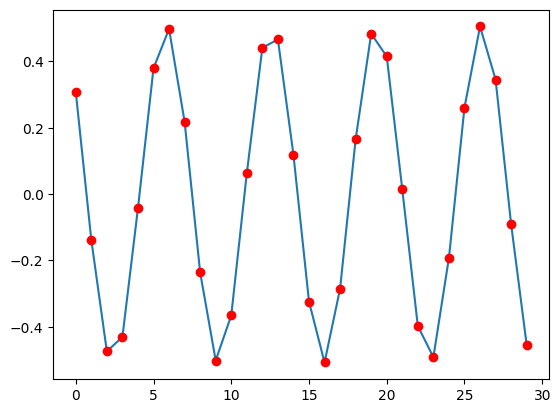

In [3]:
def eligauss_tri(A, v):
    """Gauss Elimination for tridiagonal matrix A.

    Args:
        A (np.array): Main Matrix of the system
        B (np.array): Independent Matrix of the system

    Returns:
        np.array: X (value of n variables in the system of equations)
    """
    N = len(v)

    for i in range(N - 1):
        A[i, i + 1] /= A[i, i]
        v[i] /= A[i, i]

        A[i + 1, i + 1] -= A[i + 1, i] * A[i, i + 1]
        v[i + 1] -= A[i + 1, i] * v[i]

    v[N - 1] /= A[N - 1, N - 1]

    x = np.zeros(N, float)
    x[N - 1] = v[N - 1]

    for i in range(N - 2, -1, -1):
        x[i] = v[i] - A[i, i + 1] * x[i + 1]

    return x

def position_tri(N, m, k, C, w):
    a = 2 * k - m * w**2

    A = np.zeros([N, N], float)
    v = np.zeros([N, 1], float)

    for i in range(N - 1):
        A[i, i] = a
        A[i + 1, i], A[i, i + 1] = -k, -k

    A[0, 0] += -k
    A[N - 1, N - 1] = a - k

    v[0] = C
    return eligauss_tri(A, v)

x = position_tri(30, 1, 5, 1, 2)
plt.plot(x)
plt.plot(x,'ro')
plt.show()


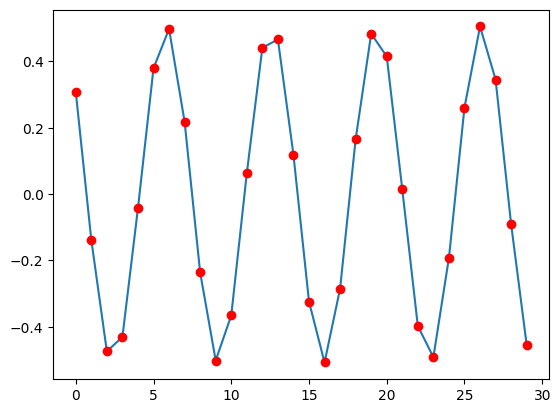

In [4]:
def eligauss_band(A, v, up, down):
    """Gauss Elimination for band matrix A.

    Args:
        A (np.array): Main Matrix of the system
        B (np.array): Independent Matrix of the system

    Returns:
        np.array: X (value of n variables in the system of equations)
    """
    N = len(v)

    for m in range(N):
        div = A[up, m]
        v[m] /= div
        for k in range(1, down + 1):
            if m + k < N:
                v[m + k] -= A[up + k, m] * v[m]

        for i in range(up):
            j = m + up - i
            if j < N:
                A[i, j] /= div
                for k in range(1, down + 1):
                    A[i + k, j] -= A[up + k, m] * A[i, j]

    for m in range(N - 2, -1, -1):
        for i in range(up):
            j = m + up - i
            if j < N:
                v[m] -= A[i, j] * v[j]

    return v


import numpy as np


def position_band(N, m, k, C, w):
    a = 2 * k - m * w**2

    Ab = np.zeros([3, N], float)
    v = np.zeros([N, 1], float)

    Ab[0, :] = -k
    Ab[1, :] = a
    Ab[2, :] = -k

    Ab[1, 0] = a - k
    Ab[1, N - 1] = a - k
    v[0] = C
    return eligauss_band(Ab, v, 1, 1)

x = position_band(30, 1, 5, 1, 2)
plt.plot(x)
plt.plot(x,'ro')
plt.show()